In [3]:
import pandas as pd
import numpy as np

# Get to know the DataSet

In [4]:
df= pd.read_csv('train.csv')
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df= df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [6]:
df.columns= [i.replace(' ','_') for i in df.columns.tolist()]

In [7]:
df.describe().T
#Give us an overview how how each variable is distributed

,count,mean,std,min,25%,50%,75%,max
Annual_Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax_Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number_of_Open_Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years_of_Credit_History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum_Open_Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number_of_Credit_Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months_since_last_delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current_Loan_Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current_Credit_Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


We have some varible come up to some value that as large as +-1E19

In [8]:
# take a look to see how many unique category in each of the non-numerical variable
print(df.Home_Ownership.unique())
print(df.Years_in_current_job.unique())
print(df.Purpose.unique())
print(df.Term.unique())

['Own Home' 'Home Mortgage' 'Rent' 'Have Mortgage']
[nan '10+ years' '8 years' '6 years' '7 years' '5 years' '1 year'
 '< 1 year' '4 years' '3 years' '2 years' '9 years']
['debt consolidation' 'other' 'home improvements' 'take a trip'
 'buy a car' 'small business' 'business loan' 'wedding'
 'educational expenses' 'buy house' 'medical bills' 'moving'
 'major purchase' 'vacation' 'renewable energy']
['Short Term' 'Long Term']


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

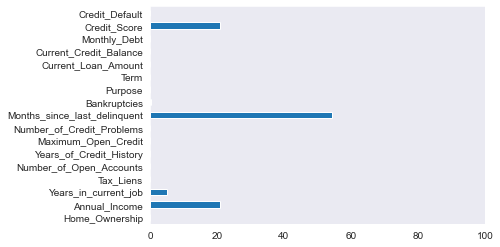

In [11]:
# check percentage of null
(100 * df.isnull().sum()/len(df)).plot(kind='barh')
plt.xlim(0, 10**2)
plt.grid();

In [12]:
def repSpace(n):
    if n != None:
        return str(n).replace(' ','_');


years_dict = {'-1': -1, '10+ years': 10, '8 years': 8, '6 years': 6, 
              '7 years': 7, '5 years': 5, '1 year': 1, '< 1 year': 0, 
              '4 years': 4, '3 years': 3, '2 years': 2, '9 years': 9}

df['Years_in_current_job'] = (df['Years_in_current_job']
                              .fillna('-1')
                              .map(years_dict))

# Distribution visualization

In [13]:
# At this Step we would deal with outliers by ploting the distributions

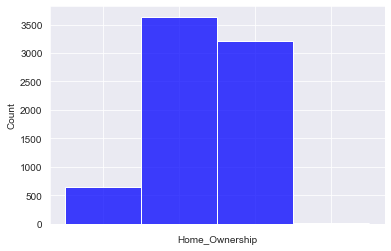

c:\users\mai nguyen van\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


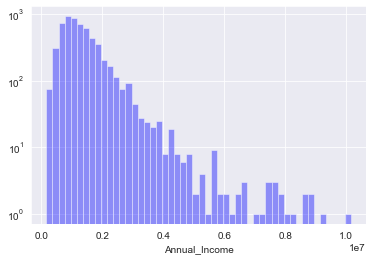

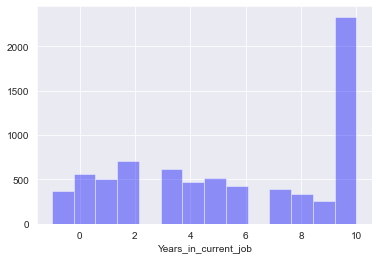

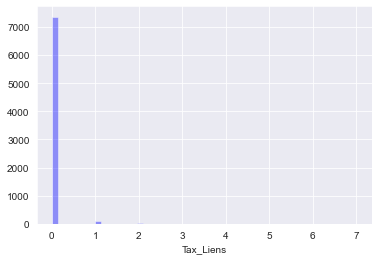

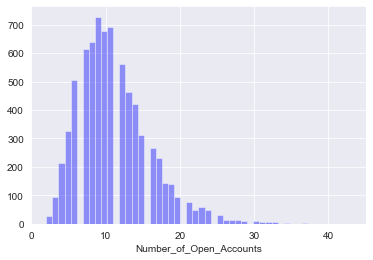

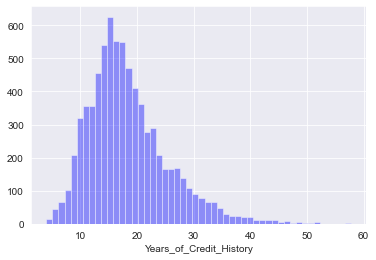

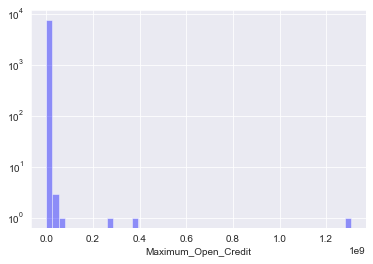

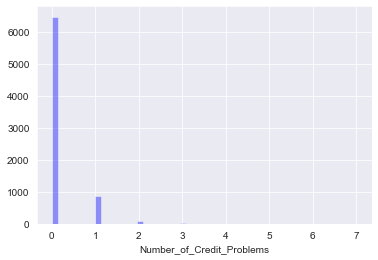

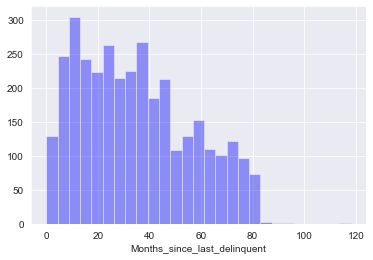

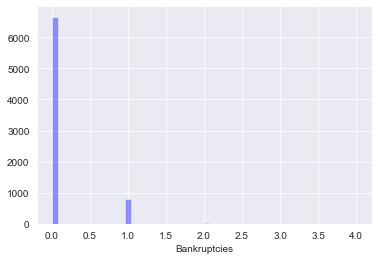

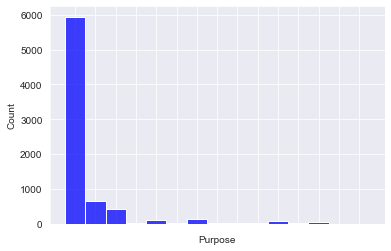

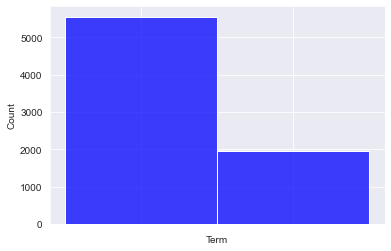

c:\users\mai nguyen van\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


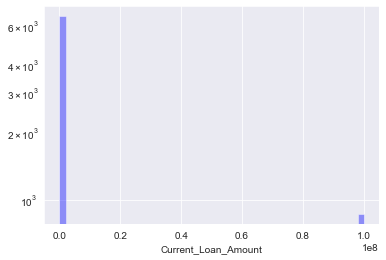

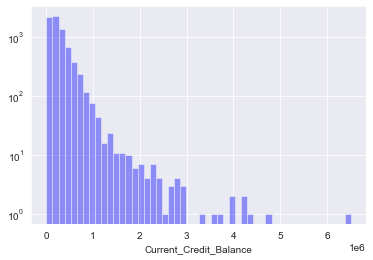

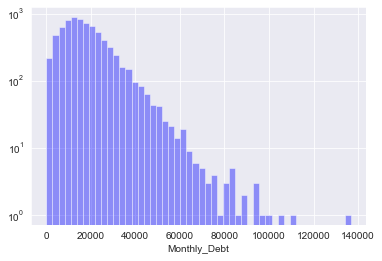

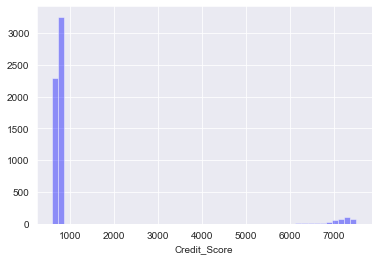

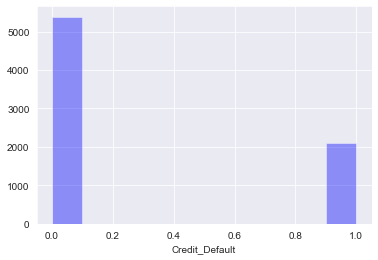

In [14]:
for i in range(df.shape[1]):
    if df.iloc[:,i].dtype == 'O': 
        fig = sns.histplot(df.iloc[:,i],kde=False, color='b' )
        fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")
        #plt.tight_layout()
        plt.show()
        continue
    fig = sns.distplot(df.iloc[:,i],kde=False, color='b' )
    if df.iloc[:,i].max() > 1e5 or df.iloc[:,i].min() <-1e5:
        fig.set_yscale('log')
    plt.show()

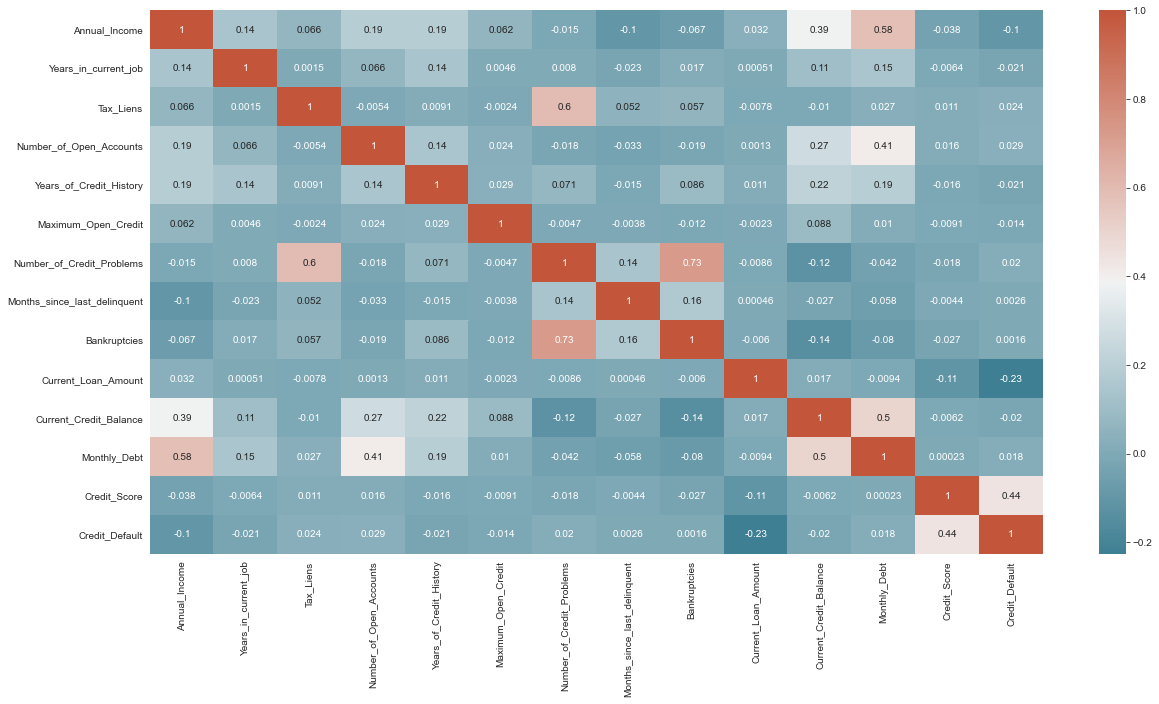

In [16]:
# correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

As we can see we dont have higly correlated couples of variables

# Data pre-processing

In [17]:
# Separating caterial and numerical variable
from sklearn.model_selection import train_test_split

num_feat = df.drop('Credit_Default', axis=1).select_dtypes(include=np.number).columns
cat_feat = df.drop('Credit_Default', axis=1).select_dtypes(include=['object']).columns
X = df.drop('Credit_Default', axis=1)
y = df['Credit_Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [18]:
# handling missing values with imputer and creating pipepines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder)
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())])
                               
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))])                              

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feat),
        ('cat', categorical_transformer, cat_feat)])


In [19]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

def AUC_result(x_train, y_train, x_test, y_test):
    result = {}
    models = [LogisticRegression(solver = 'lbfgs'), KNeighborsClassifier(n_neighbors=2), 
                  SVC(probability = True), DecisionTreeClassifier(), GaussianNB() ]
    for i in range(len(models)):
        
        model = models[i]
        model.fit(x_train, y_train)
        result[str(model)] = '{0: 5.3f}'.format(roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))
    return result

In [21]:
AUC_result(X_train_prepared, y_train, X_test_prepared, y_test)

c:\users\mai nguyen van\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression()': ' 0.752',
 'KNeighborsClassifier(n_neighbors=2)': ' 0.645',
 'SVC(probability=True)': ' 0.716',
 'DecisionTreeClassifier()': ' 0.623',
 'GaussianNB()': ' 0.733'}